In [2]:
from transformers import GPT2LMHeadModel

from datasets import load_dataset

/home/vamsi/Desktop/projects/practice_nanogpt/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
custom_storage_path='~/jl_fs/.cache/huggingface'

remote_name='sample-10BT'

In [4]:
# mv ~/.cache/huggingface ~/jl_fs/huggingface
# ln -s ~/jl_fs/huggingface ~/.cache/huggingface
# 

In [5]:
# git config --global user.email "uvamsi76@gmail.com"
# git config --global user.name "Vamsi Uppuluri"

In [5]:
load_dataset("HuggingFaceFW/fineweb-edu",name=remote_name, split="train" , streaming=True)

IterableDataset({
    features: ['text', 'id', 'dump', 'url', 'file_path', 'language', 'language_score', 'token_count', 'score', 'int_score'],
    num_shards: 14
})

In [8]:
fw=load_dataset("HuggingFaceFW/fineweb-edu",name=remote_name, split="train" , streaming=True)

In [9]:
c=0
for i in fw:
    if(c==4):
        break
    print(i)
    c+=1

{'text': 'The Independent Jane\nFor all the love, romance and scandal in Jane Austen’s books, what they are really about is freedom and independence. Independence of thought and the freedom to choose.\nElizabeth’s refusal of Mr. Collins offer of marriage showed an independence seldom seen in heroines of the day. Her refusal of Mr. Darcy while triggered by anger showed a level of independence that left him shocked and stunned.\nThe freedom she exhibited in finally accepting him in direct defiance of Lady Catherine and knowing her father would disapprove was unusual even for Austen. In her last book Anne Elliot is persuaded to refuse Captain Wentworth at Lady Russel’s insistence.\nAlthough Jane played by the rules of the day, all of her writing is infused with how she wanted life to be. She ‘screams’ her outrage at the limitations for women in Emma.\nWhen accosted by Mrs. Elton, Jane Fairfax says,\n“Excuse me, ma’am, but this is by no means my intention; I make no inquiry myself, and sho

In [6]:
model_hf=GPT2LMHeadModel.from_pretrained('gpt2')

In [9]:
sd_hf=model_hf.state_dict()
c=0
for k,v in sd_hf.items():
    c+=1
    print(k,v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [10]:
# print(c)

In [11]:
import matplotlib.pyplot as plt

In [20]:
sd_hf['transformer.wte.weight'][:,1].shape

torch.Size([50257])

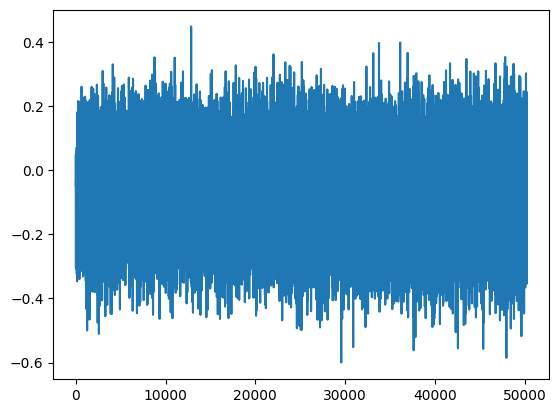

In [21]:
plt.plot(sd_hf['transformer.wte.weight'][:,1])

In [31]:
import numpy as np

In [47]:
y=np.linspace(-1,1,50257)

In [48]:
y

array([-1.        , -0.9999602 , -0.99992041, ...,  0.99992041,
        0.9999602 ,  1.        ], shape=(50257,))

In [54]:
sd_hf["transformer.wte.weight"][:,1].shape[0]

50257

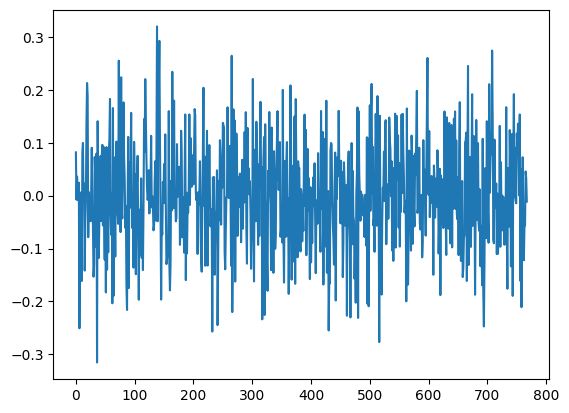

In [67]:
plt.plot(range(768),sd_hf["transformer.wte.weight"][300,:])

In [69]:
sd_hf['transformer.h.0.attn.c_attn.weight'].shape

torch.Size([768, 2304])

In [70]:
q,k,v=sd_hf['transformer.h.0.attn.c_attn.weight'].split(768, dim=1)

In [73]:
v.shape

torch.Size([768, 768])

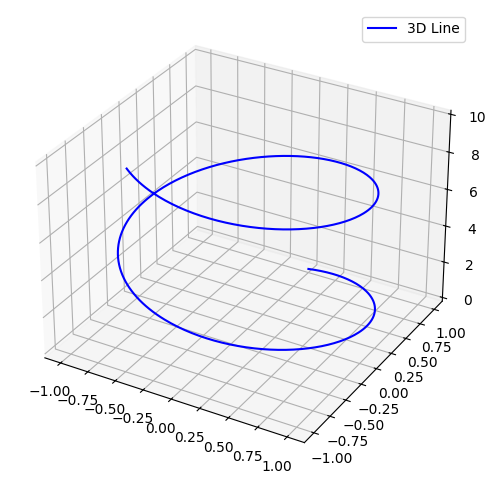

In [76]:
# Data
t = np.linspace(0, 10, 500)
x = np.sin(t)
y = np.cos(t)
z = t

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Line plot
ax.plot(x, y, z, label='3D Line', color='blue')
ax.legend()
plt.show()

In [78]:
len(t)

500

In [79]:
t_h = np.linspace(-5, 5, 768)

In [96]:
q.min()

tensor(-1.4801)

In [99]:
x = np.arange(768)  # Number of columns
y = np.linspace(-2, 2, 768)  # Number of rows
X, Y = np.meshgrid(y, y)

In [113]:
i=q@k.T

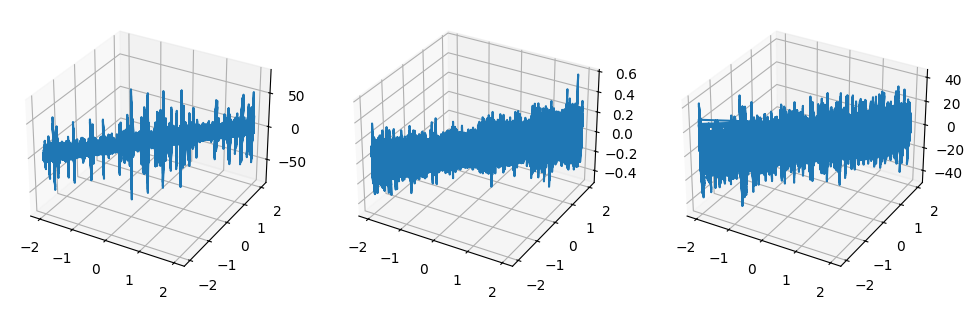

In [114]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(131, projection='3d')
ax.plot(y, y, i)
ax = fig.add_subplot(132, projection='3d')
ax.plot(y, y, v)
ax = fig.add_subplot(133, projection='3d')
ax.plot(y, y, i@v.T)

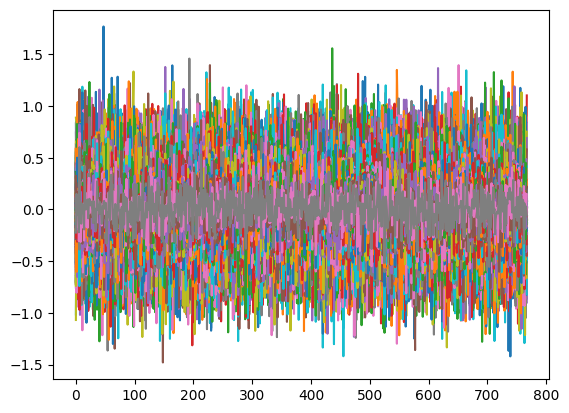

In [ ]:
plt.plot(range(768),q)

In [22]:
sd_hf["transformer.wpe.weight"][:,:2].shape

torch.Size([1024, 2])

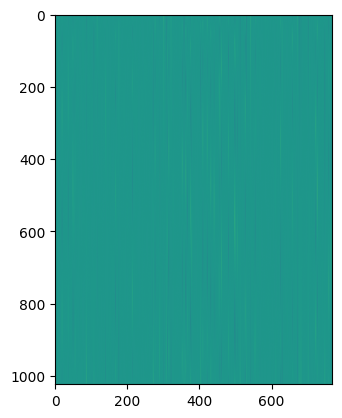

In [ ]:
plt.imshow(sd_hf["transformer.wpe.weight"])

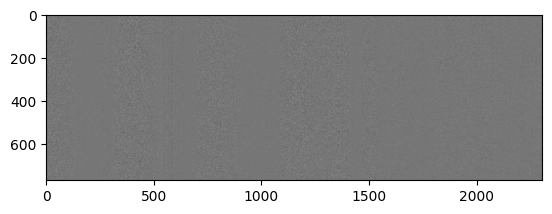

In [48]:
plt.imshow(sd_hf["transformer.h.1.attn.c_attn.weight"],cmap="grey")

In [53]:
sd_hf["transformer.h.1.attn.c_attn.weight"][:,1].shape

torch.Size([768])

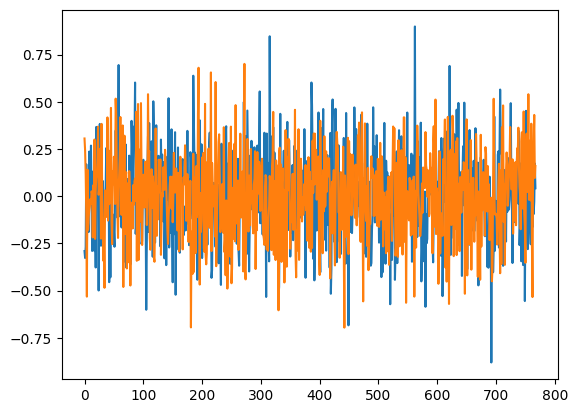

In [54]:
plt.plot(sd_hf["transformer.h.1.attn.c_attn.weight"][:,:2])

In [58]:
from transformers import pipeline,set_seed
generator=pipeline('text-generation',model='gpt2')
set_seed(42)
generator("Hello I'm a language model,",max_length=30,num_return_sequences=5)

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Hello I\'m a language model, and not a model as much as I\'d like to be. It\'s not like I\'m going to go and do an algorithm like some other programming language or some other code. It\'s like a model for you."\n\nTekkow: "I would love to be able to do a better understanding of how AI, and especially AI that\'s not human but is smarter than us, learns. But'},
 {'generated_text': "Hello I'm a language model, and not a model as much as I'd like to be. I wanted to explain why it gets different because I'm always a little bit of a guy, as you know.\n\nI understand where he's coming from, but I'm not sure if he's a linguist, or a language model. I haven't studied any of his texts as far as those two languages. It seems like he's"},
 {'generated_text': "Hello I'm a language model, and not a model as much as I'd like to be.\n\nWhen I say we're going to create a system where I'm able to use a language with my own language, I don't mean that I can just speak English. I thin

In [63]:
print("The number of parameters : %.2fM"% (1e5/1e6))

The number of parameters : 0.10M


In [64]:
import torch

In [67]:
torch.arange(0,10,dtype=torch.long).unsqueeze(0)

torch.Size([1, 10])

In [6]:
import tiktoken
import torch

In [2]:
enc=tiktoken.get_encoding('gpt2')

In [4]:
a=enc.encode("hi I am a language model")

In [8]:
a=torch.tensor(a,dtype=torch.long)

In [31]:
a=a.unsqueeze(0).repeat(5,1)

In [32]:
a.shape

torch.Size([5, 6])

In [34]:
logits=torch.randn(5,7,24)

In [35]:
logits=logits[:,-1,:]

In [52]:
logits.shape

torch.Size([5, 24])

In [38]:
topk_probs,topk_ind=torch.topk(logits,3,dim=-1)

In [49]:
ix=torch.multinomial(topk_probs,1)

In [56]:
x=torch.gather(topk_ind,-1,ix)

In [69]:
a=torch.cat((a,x),dim=1)

In [70]:
a

tensor([[5303,  314,  716,  257, 3303, 2746,   20,   20,   20,   20,   20,   20],
        [5303,  314,  716,  257, 3303, 2746,    1,    1,    1,    1,    1,    1],
        [5303,  314,  716,  257, 3303, 2746,   15,   15,   15,   15,   15,   15],
        [5303,  314,  716,  257, 3303, 2746,   17,   17,   17,   17,   17,   17],
        [5303,  314,  716,  257, 3303, 2746,    2,    2,    2,    2,    2,    2]])

In [4]:
# # # We always start with a dataset to train on. Let's download the tiny shakespeare dataset
# !wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

In [6]:
with open ('input.txt','r') as f:
    text=f.read()
data=text[:1000]
print(data[:100])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You


In [20]:
import tiktoken
import torch

In [8]:
enc=tiktoken.get_encoding('gpt2')

In [14]:
tokens=enc.encode(data)

In [18]:
tokens[:10]

[5962, 22307, 25, 198, 8421, 356, 5120, 597, 2252, 11]

In [25]:
buf=torch.tensor(tokens[:24+1])
x=buf[:-1].view(4,6)
y=buf[1:].view(4,6)

In [1]:
import torch

In [5]:
a=torch.nn.Linear(10,10)

In [6]:
a.weight

Parameter containing:
tensor([[ 0.0353, -0.2434, -0.1049,  0.0325,  0.0037,  0.1224, -0.0012, -0.2265,
          0.2306,  0.0923],
        [-0.1675,  0.2114,  0.2851,  0.1790, -0.2229, -0.1490, -0.0445,  0.0089,
         -0.0243,  0.1533],
        [-0.2986,  0.3060, -0.1027,  0.0619, -0.2284, -0.1002,  0.2929,  0.0422,
          0.0379, -0.2527],
        [ 0.0850, -0.2533, -0.1462,  0.2875, -0.1091, -0.0427, -0.2155, -0.1608,
          0.0809, -0.1213],
        [ 0.1047,  0.3150, -0.2243, -0.2117, -0.1901, -0.1159, -0.2450, -0.2407,
         -0.2244, -0.0627],
        [ 0.2441, -0.2792,  0.2459, -0.1697,  0.1658, -0.2776, -0.1830,  0.1859,
         -0.0930,  0.2215],
        [-0.2330, -0.1301, -0.2573, -0.0141,  0.0715,  0.2095, -0.0156,  0.0428,
         -0.2785, -0.3056],
        [ 0.1120,  0.0749, -0.0869, -0.2953, -0.2506, -0.1335, -0.2556,  0.2430,
         -0.2018,  0.2151],
        [-0.2615,  0.0495,  0.0178,  0.1761, -0.1912,  0.2548, -0.1970,  0.1328,
          0.2376, -0.2287

In [11]:
torch.nn.init.zeros_(a.weight)

Parameter containing:
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], requires_grad=True)

In [2]:
from model import GPT, GPTconfig
import torch
config = GPTconfig(vocab_size=50304)
model = GPT(config)

The number of parameters : 124.48M


In [37]:
model.to('cuda')

GPT(
  (transformer): ModuleDict(
    (wpe): Embedding(1024, 768)
    (wte): Embedding(50304, 768)
    (h): ModuleList(
      (0-11): 12 x Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): CasualSelfAttention(
          (c_attn): Linear(in_features=768, out_features=2304, bias=True)
          (c_proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): MLP(
          (c_fc): Linear(in_features=768, out_features=3072, bias=True)
          (gelu): GELU(approximate='tanh')
          (c_proj): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50304, bias=False)
)

In [45]:
model.cpu()

GPT(
  (transformer): ModuleDict(
    (wpe): Embedding(1024, 768)
    (wte): Embedding(50304, 768)
    (h): ModuleList(
      (0-11): 12 x Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): CasualSelfAttention(
          (c_attn): Linear(in_features=768, out_features=2304, bias=True)
          (c_proj): Linear(in_features=768, out_features=768, bias=True)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): MLP(
          (c_fc): Linear(in_features=768, out_features=3072, bias=True)
          (gelu): GELU(approximate='tanh')
          (c_proj): Linear(in_features=3072, out_features=768, bias=True)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50304, bias=False)
)

In [ ]:

# from torch.nn.parallel import DistributedDataParallel as DDP

In [ ]:

# from torch.distributed import init_process_group, destroy_process_group

In [ ]:

# torch.cuda.set_device('cuda:0')

In [43]:
# init_process_group(backend='nccl')

In [44]:
# model=DDP(model,device_ids=[0])

In [34]:
i=0

In [35]:
torch.save(model.state_dict(),f"modelvers/model_state_{i}.pth")
i+=1

In [3]:
loaded=GPT(config)

The number of parameters : 124.48M


In [5]:
loaded_2=torch.load('model/final_model.pth',map_location=torch.device("cpu"))

/tmp/ipykernel_136552/2166528903.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_2=torch.load('model/final_model.pth',map_location=torch.device("cpu"))


In [8]:
for k,v in loaded_2.state_dict().items():
    print(k)

transformer.wpe.weight
transformer.wte.weight
transformer.h.0.ln_1.weight
transformer.h.0.ln_1.bias
transformer.h.0.attn.c_attn.weight
transformer.h.0.attn.c_attn.bias
transformer.h.0.attn.c_proj.weight
transformer.h.0.attn.c_proj.bias
transformer.h.0.ln_2.weight
transformer.h.0.ln_2.bias
transformer.h.0.mlp.c_fc.weight
transformer.h.0.mlp.c_fc.bias
transformer.h.0.mlp.c_proj.weight
transformer.h.0.mlp.c_proj.bias
transformer.h.1.ln_1.weight
transformer.h.1.ln_1.bias
transformer.h.1.attn.c_attn.weight
transformer.h.1.attn.c_attn.bias
transformer.h.1.attn.c_proj.weight
transformer.h.1.attn.c_proj.bias
transformer.h.1.ln_2.weight
transformer.h.1.ln_2.bias
transformer.h.1.mlp.c_fc.weight
transformer.h.1.mlp.c_fc.bias
transformer.h.1.mlp.c_proj.weight
transformer.h.1.mlp.c_proj.bias
transformer.h.2.ln_1.weight
transformer.h.2.ln_1.bias
transformer.h.2.attn.c_attn.weight
transformer.h.2.attn.c_attn.bias
transformer.h.2.attn.c_proj.weight
transformer.h.2.attn.c_proj.bias
transformer.h.2.ln_2

In [4]:
loaded_state_dict=torch.load("modelvers/model_state_1.pth")

/tmp/ipykernel_136552/2449454777.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_state_dict=torch.load("modelvers/model_state_1.pth")


In [32]:
loaded_cpu_sd={k: v.cpu() for k, v in loaded_state_dict.items()}

In [1]:
plt.plot(loaded_cpu_sd["transformer.wpe.weight"][:,1])

NameError: name 'plt' is not defined

In [ ]:
scp -P 11214 root@sshd.jarvislabs.ai:/home/practice_nanogpt/logh100.txt /media/vamsi/New Volume/model-state-dict/

In [ ]:
~/.ssh/id_rsa

In [ ]:
scp -i ~/.ssh/id_rsa -P 11214 root@sshd.jarvislabs.ai:/home/practice_nanogpt/logh100.txt /media/vamsi/'New Volume'/model-state-dict

In [ ]:
# scp -i ~/.ssh/id_rsa -P 11214 root@sshd.jarvislabs.ai:/home/practice_nanogpt/testing_folder /media/vamsi/'New Volume'/model-state-dict

In [ ]:
rsync -avz -e "ssh -i ~/.ssh/id_rsa -p 11214" root@sshd.jarvislabs.ai:/home/jl_fs/modelvers "/media/vamsi/New Volume/model-state-dict"

In [ ]:
rsync -avz -e "ssh -i ~/.ssh/id_rsa -p 21214" root@ssha.jarvislabs.ai:/home/jl_fs/modelvers "/media/vamsi/New Volume/model-state-dict"

In [ ]:
rsync -avz -i ~/.ssh/id_rsa -P 11214 root@sshd.jarvislabs.ai:/home/practice_nanogpt/logh100.txt /media/vamsi/New Volume/model-state-dict